# Polynomial Regression

This regression is used when we are dealing with non linear relationship b/w variables.

In [1]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

$ y = x^{3} + 100 + c $

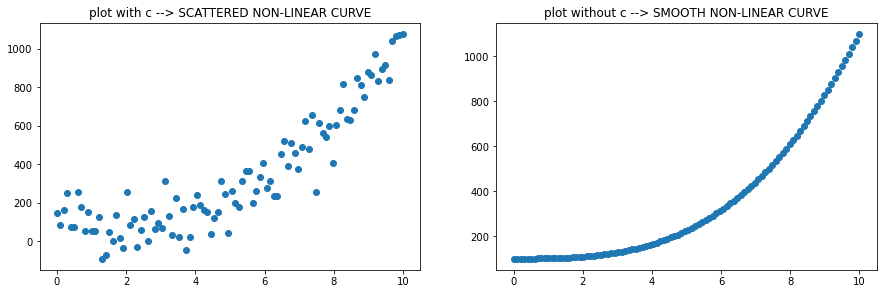

In [2]:
np.random.seed(42)
n_samples = 100

x = np.linspace(0,10,100)
c = np.random.randn(n_samples) * 100
y = x**3 + c + 100

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.scatter(x,y)
plt.title('plot with c --> SCATTERED NON-LINEAR CURVE')

# if we remove c (error term).....
plt.subplot(2,2,2)
plt.title('plot without c --> SMOOTH NON-LINEAR CURVE')
plt.scatter(x,y - c)


#### This is a non linear pattern as y contains higher degree terms. c is error term becoz of c we get sactterd plot.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

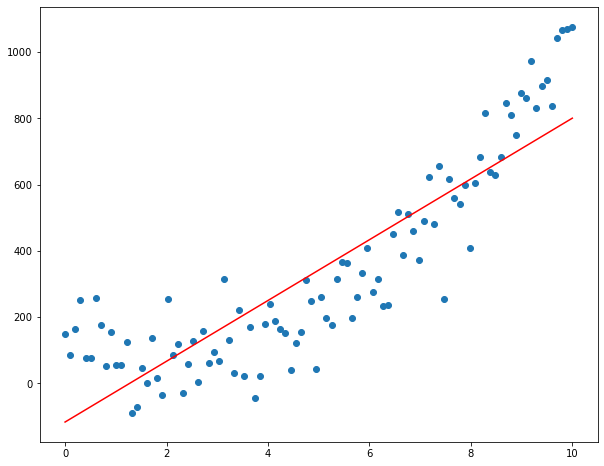

0.7643394574930141


In [4]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
y_predict = lr.predict(x.reshape(-1,1))

plt.figure(figsize = (10,8))
plt.scatter(x,y)
plt.plot(x,y_predict,c = 'red')
plt.show()
print(r2_score(y,y_predict))

In [5]:
from sklearn.preprocessing import PolynomialFeatures

**PolynomialFeatures:** Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example,

>if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

>if an input sample is one dimensional and of the form [a], the degree-2 polynomial features are [1, a,  a^2].

In [6]:
# for testing puprpose,

p = np.array([1,2,3,4,5])

p_degree2 = PolynomialFeatures(degree = 2)
p_degree3 = PolynomialFeatures(degree = 3)

p2 = p_degree2.fit_transform(p.reshape(-1,1))
p3 = p_degree3.fit_transform(p.reshape(-1,1))

print(p) # [x]
print(p2) # [1,x,x^2]
print(p3) #  [1,x,x^2,x^3]

[1 2 3 4 5]
[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]
[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


In [7]:
polyF = PolynomialFeatures(degree = 2) # convert feature into [const,feature_x,x^2]
x_transformed = polyF.fit_transform(x.reshape(-1,1)) # convert (100,1) array to (100,3) array
#print(x.reshape(-1,1))
#print(x_transformed)

#print(x.reshape(-1,1).shape)  # (100,1)
#print(x_transformed.shape)    # (100,3)

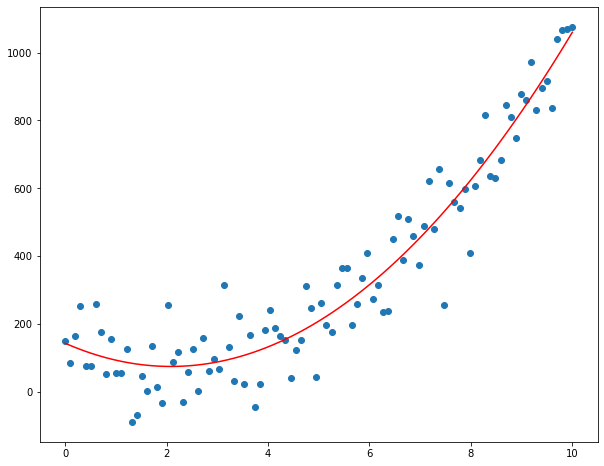

0.9173858308909386


In [8]:
lr2 = LinearRegression()
lr2.fit(x_transformed,y.reshape(-1,1))
y_pred = lr2.predict(x_transformed)

plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,y_pred,c = 'red')
plt.show()
print(r2_score(y,y_pred))

R2 score is high after applying polynomialfeatures transformation.

### Analyzing boston data (for non-linearity)

In [9]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(data.data,columns = data.feature_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
x_boston = df['DIS'].values
y_boston = df['NOX'].values

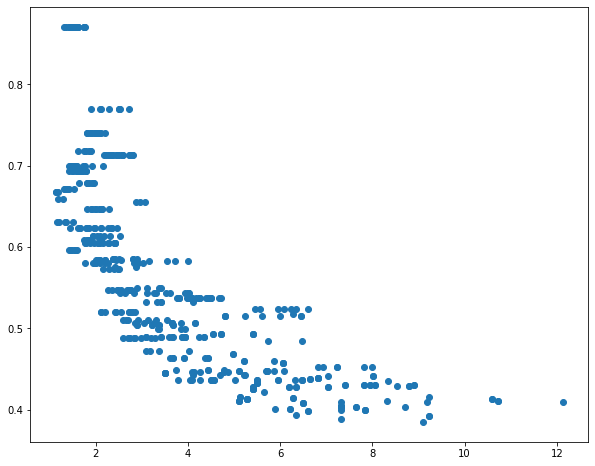

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(x_boston,y_boston)
plt.show()

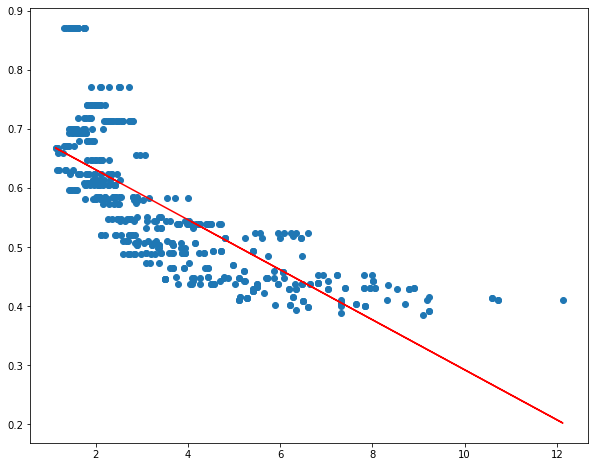

r2_score:0.59


In [12]:
# LINEAR :

model = LinearRegression()
model.fit(x_boston.reshape(-1,1),y_boston)
y_bostonpredict = model.predict(x_boston.reshape(-1,1))

plt.figure(figsize = (10,8))
plt.scatter(x_boston,y_boston)
plt.plot(x_boston,y_bostonpredict,c = 'red')
plt.show()
print("r2_score:{:,.2f}".format(r2_score(y_boston,y_bostonpredict)))

[[ 1.1296]
 [ 2.1296]
 [ 3.1296]
 [ 4.1296]
 [ 5.1296]
 [ 6.1296]
 [ 7.1296]
 [ 8.1296]
 [ 9.1296]
 [10.1296]
 [11.1296]]


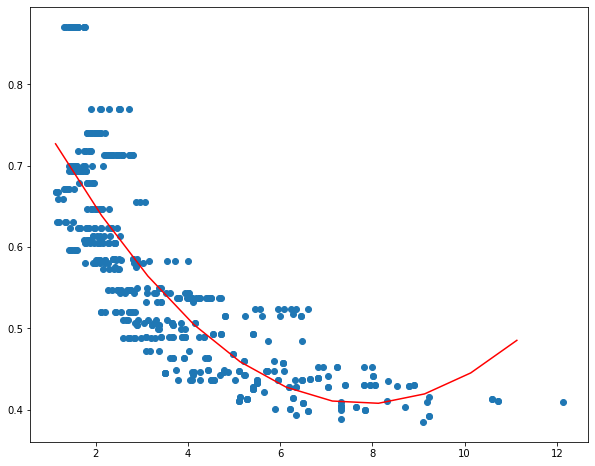

r2_score:0.70


In [13]:
# QUADRATIC:

# convert x into degree 2 poly
a = PolynomialFeatures(degree = 2)
newx_boston = a.fit_transform(x_boston.reshape(-1,1))

# fit it to LR 
model2 = LinearRegression()
model2.fit(newx_boston,y_boston)
y_bostonpredict2 = model2.predict(newx_boston)

# arange x to get a clear reg. line ----> [used in plotting line]
x_fit = np.arange(x_boston.min(),x_boston.max(),1)[:,np.newaxis]
print(x_fit)
y_fitpredict = model2.predict(a.fit_transform(x_fit.reshape(-1,1)))

plt.figure(figsize = (10,8))
plt.scatter(x_boston,y_boston)
plt.plot(x_fit,y_fitpredict,c = 'red')
plt.show()

print("r2_score:{:,.2f}".format(r2_score(y_boston,y_bostonpredict2)))

#### Polynomial model is good for non linear data fitting but it is not the best one. As we can see that in above figure model is considered to be good upto the x_axis  = 8 and after that the model is not good.

#### r2 score is increased from linear to quadratic but still this model is not used.

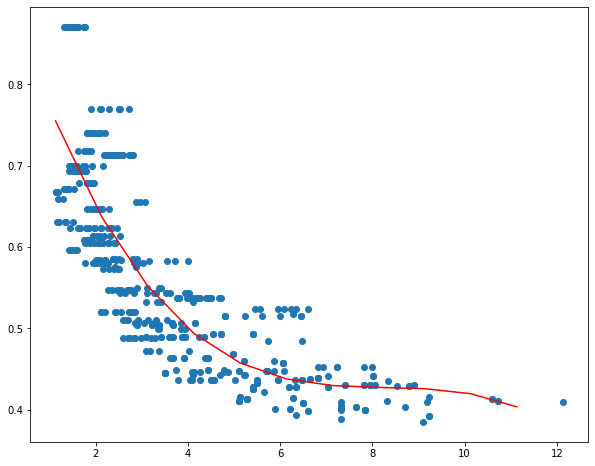

r2_score:0.71


In [14]:
# CUBIC:

# convert x into degree 2 poly
a = PolynomialFeatures(degree = 3)
newx_boston = a.fit_transform(x_boston.reshape(-1,1))

# fit it to LR 
model2 = LinearRegression()
model2.fit(newx_boston,y_boston)
y_bostonpredict2 = model2.predict(newx_boston)

# arange x to get a clear reg. line ----> [used in plotting line]
x_fit = np.arange(x_boston.min(),x_boston.max(),1)[:,np.newaxis]
#print(x_fit)
y_fitpredict = model2.predict(a.fit_transform(x_fit.reshape(-1,1)))

plt.figure(figsize = (10,8))
plt.scatter(x_boston,y_boston)
plt.plot(x_fit,y_fitpredict,c = 'red')
plt.show()

print("r2_score:{:,.2f}".format(r2_score(y_boston,y_bostonpredict2)))

#### if degree is more, there is chances of overfitting of model.

# Non-Linear Relationship

In [15]:
data = pd.read_csv('D:\\PycharmProjects\\UdemyML\\data\\housing.csv',delim_whitespace = True, header = None)

In [16]:
data.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [17]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [50]:
X = data[['LSTAT']].values
Y = data['MEDV'].values

## Brief Introduction to DecisionTree:

In [19]:
from sklearn.tree import DecisionTreeRegressor

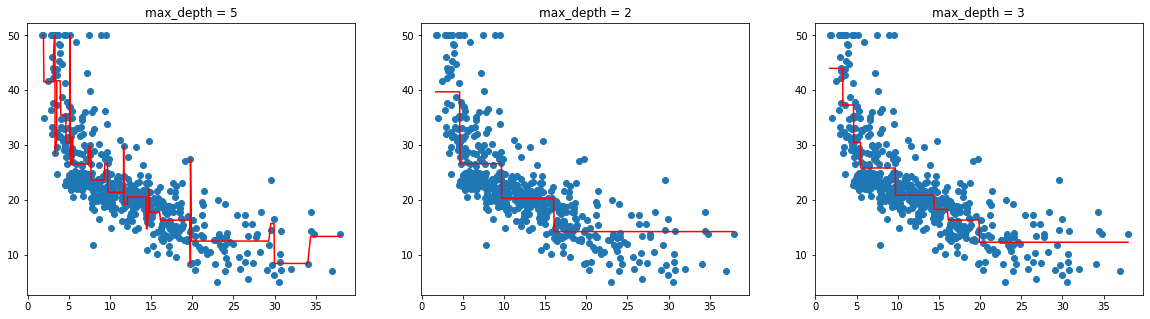

In [20]:
tree = DecisionTreeRegressor(max_depth = 5)  
tree.fit(X,Y)

sort_idx = X.flatten().argsort()


plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.title('max_depth = 5')
plt.scatter(X[sort_idx],Y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),c = 'red')

############################_depth = 2_#############################################

tree = DecisionTreeRegressor(max_depth = 2)
tree.fit(X,Y)

sort_idx = X.flatten().argsort()

plt.subplot(1,3,2)
plt.title('max_depth = 2')
plt.scatter(X[sort_idx],Y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),c = 'red')

###############################_depth = 3_#############################################
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X,Y)

sort_idx = X.flatten().argsort()

plt.subplot(1,3,3)
plt.title('max_depth = 3')
plt.scatter(X[sort_idx],Y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),c = 'red')
plt.show()


>model fitting is quite good when max_depth is 3.
>There is chances of overfitting when max_depth is 5.



## Brief Introduction to RandomForest:

In [21]:
X = data.drop('MEDV',axis = 1)
Y = data['MEDV'].values

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 500,criterion='mse',random_state=42,n_jobs=-1)

In [24]:
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [25]:
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

In [26]:
from sklearn.metrics import r2_score,mean_squared_error

In [27]:
print("train mse:{0:,.4f}".format(mean_squared_error(y_train,y_train_pred)))
print("test mse:{0:,.4f}".format(mean_squared_error(y_test,y_test_pred)))

train mse:1.8700
test mse:9.3921


In [28]:
print("train r2_score:{0:,.4f}".format(r2_score(y_train,y_train_pred)))
print("test r2_score:{0:,.4f}".format(r2_score(y_test,y_test_pred)))

train r2_score:0.9787
test r2_score:0.8740


Here **train mse < test mse** and also **r2 train > r2 test**.......that means our model is not good.

## Brief Introduction to AdaBoost:

In [29]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4),n_estimators = 500,random_state=42)

In [30]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [31]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [32]:
print("train mse:{0:,.4f}".format(mean_squared_error(y_train,y_train_pred)))
print("test mse:{0:,.4f}".format(mean_squared_error(y_test,y_test_pred)))

train mse:4.6605
test mse:13.4949


In [33]:
print("train r2_score:{0:,.4f}".format(r2_score(y_train,y_train_pred)))
print("test r2_score:{0:,.4f}".format(r2_score(y_test,y_test_pred)))

train r2_score:0.9470
test r2_score:0.8189


# Feature Importance

we have 13 features in boston data.

>Are they all equally important ??
>Which features are more imp ??
>Can scikitlearn help us with this ??

### According to ADABOOST:

In [34]:
ada.feature_importances_

array([0.03104826, 0.00243815, 0.01083651, 0.00085548, 0.0371141 ,
       0.23589575, 0.00958776, 0.13743614, 0.01893706, 0.02188852,
       0.04185043, 0.02193283, 0.43017901])

In [35]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [36]:
result = pd.DataFrame(ada.feature_importances_,columns)
result.columns = ['feature']

In [37]:
result

,feature
CRIM,0.031048
ZN,0.002438
INDUS,0.010837
CHAS,0.000855
NOX,0.037114
RM,0.235896
AGE,0.009588
DIS,0.137436
RAD,0.018937
TAX,0.021889


In [38]:
result.sort_values(by = 'feature',ascending = False)

,feature
LSTAT,0.430179
RM,0.235896
DIS,0.137436
PTRATIO,0.041850
NOX,0.037114
CRIM,0.031048
B,0.021933
TAX,0.021889
RAD,0.018937
INDUS,0.010837


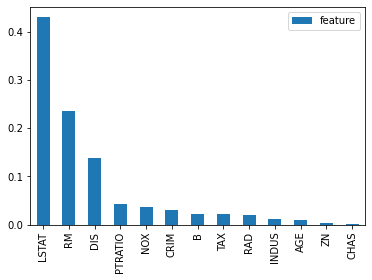

In [39]:
result.sort_values(by = 'feature',ascending = False).plot(kind = 'bar')

### According to RANDOM_FOREST:

In [40]:
forest.feature_importances_

array([0.03213849, 0.00166784, 0.00677542, 0.00131141, 0.01508521,
       0.4038535 , 0.01414013, 0.06280815, 0.00467201, 0.0120068 ,
       0.01833147, 0.0127986 , 0.41441098])

In [41]:
res = pd.DataFrame(forest.feature_importances_,columns)
res.columns = ['feature']
res.sort_values(by = 'feature',ascending = False)


,feature
LSTAT,0.414411
RM,0.403853
DIS,0.062808
CRIM,0.032138
PTRATIO,0.018331
NOX,0.015085
AGE,0.014140
B,0.012799
TAX,0.012007
INDUS,0.006775


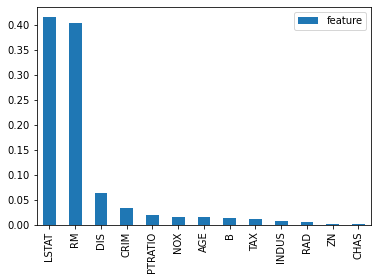

In [42]:
res.sort_values(by = 'feature',ascending = False).plot(kind = 'bar')

# Exercise :

In [43]:
# use decision tree

X = data.drop('MEDV',axis = 1)
Y = data['MEDV'].values

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [44]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [45]:
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [46]:
print("train mse: {:,.3f}".format(mean_squared_error(y_train,y_train_pred)))
print("test mse: {:,.3f}".format(mean_squared_error(y_test,y_test_pred)))

train mse: 15.368
test mse: 16.928


In [47]:
print("r2_score mse: {:,.3f}".format(r2_score(y_train,y_train_pred)))
print("r2_score mse: {:,.3f}".format(r2_score(y_test,y_test_pred)))

r2_score mse: 0.825
r2_score mse: 0.773


In [48]:
result = pd.DataFrame(tree.feature_importances_,columns)
result.columns = ['feature']
result.sort_values(by = 'feature',ascending = False)

,feature
RM,0.644203
LSTAT,0.203562
DIS,0.104239
NOX,0.027021
PTRATIO,0.020974
CRIM,0.000000
ZN,0.000000
INDUS,0.000000
CHAS,0.000000
AGE,0.000000


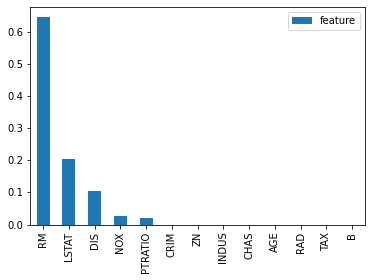

In [49]:
result.sort_values(by = 'feature',ascending = False).plot(kind = 'bar')

#### As we can see that using the 3 different non linear regressor (adaboost,random forest and decision tree) , we find the same first 3 imp features which is LSTAT, RM, DIS.